In [15]:
path='T_LOVCLIM_800/loveclim784k/proj/elke/data/loveclim784k/loveclim_784k_seaice.nc'

import xarray as xr

seaice_all_F= xr.open_dataset(path)
seaice_all_F

<xarray.Dataset>
Dimensions:    (mtime: 7840, latitude: 72, longitude: 144)
Coordinates:
  * latitude   (latitude) float64 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * longitude  (longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * mtime      (mtime) float64 784.0 783.9 783.8 783.7 783.6 ... 0.4 0.3 0.2 0.1
Data variables:
    ice        (mtime, latitude, longitude) float64 ...
    icep       (mtime, latitude, longitude) float64 ...
    uice       (mtime, latitude, longitude) float64 ...
    vice       (mtime, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.7
    title:        Loveclim 784k ice
    note:         100 year average

# Visualize data

In [17]:
import matplotlib.pyplot as plt

def plot_ice_timeseries(dataset, latitude_index=10):
    """
    Plots the time series for ice, icep, uice, and vice for a given latitude index.
    
    Args:
    dataset (xarray.Dataset): The dataset containing the sea ice variables.
    latitude_index (int): The index of the latitude for which to plot the time series.
    """
    # Select the first longitude (assuming data is present for all longitudes)
    first_lon = dataset.longitude.isel(longitude=0)

    # Extract data for plotting at the specified latitude index
    ice_series = dataset['ice'].isel(latitude=latitude_index, longitude=0)
    icep_series = dataset['icep'].isel(latitude=latitude_index, longitude=0)
    uice_series = dataset['uice'].isel(latitude=latitude_index, longitude=0)
    vice_series = dataset['vice'].isel(latitude=latitude_index, longitude=0)

    # Create a 2x2 plot layout
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    # Plot each variable
    axs[0, 0].plot(ice_series['mtime'], ice_series)
    axs[0, 0].set_title('Ice')
    axs[0, 0].set_xlabel('Time (mtime)')
    axs[0, 0].set_ylabel('Ice')

    axs[0, 1].plot(icep_series['mtime'], icep_series)
    axs[0, 1].set_title('Icep')
    axs[0, 1].set_xlabel('Time (mtime)')
    axs[0, 1].set_ylabel('Icep')

    axs[1, 0].plot(uice_series['mtime'], uice_series)
    axs[1, 0].set_title('Uice')
    axs[1, 0].set_xlabel('Time (mtime)')
    axs[1, 0].set_ylabel('Uice')

    axs[1, 1].plot(vice_series['mtime'], vice_series)
    axs[1, 1].set_title('Vice')
    axs[1, 1].set_xlabel('Time (mtime)')
    axs[1, 1].set_ylabel('Vice')

    # Display the plot with a tight layout
    plt.tight_layout()
    plt.show()



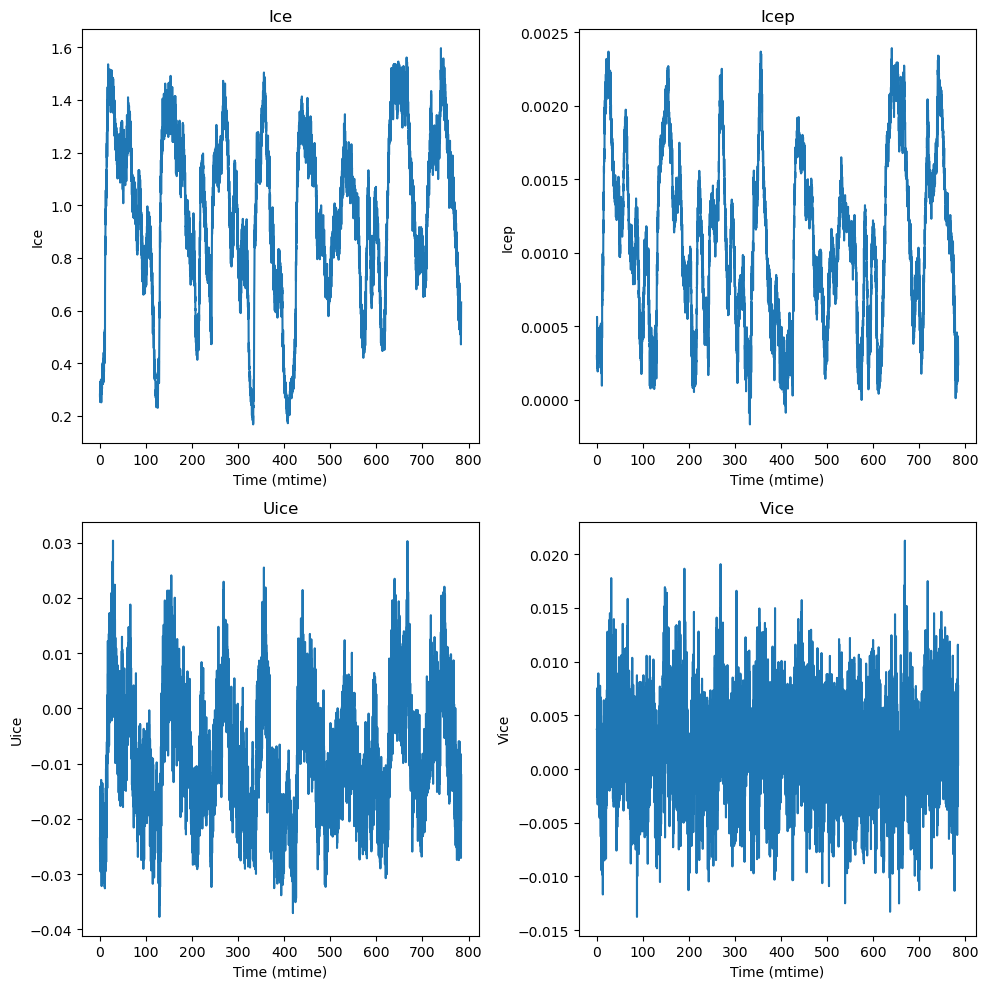

In [18]:
plot_ice_timeseries(seaice_all_F, 10)

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import xarray as xr

def plot_global_ice_variables(dataset):
    """
    Plots global maps of ice, icep, uice, and vice variables at the first time step.

    Args:
    dataset (xarray.Dataset): The dataset containing the sea ice variables.
    """
    plt.figure(figsize=(14, 10))
    
    # Get latitudes and longitudes
    lons = dataset.longitude.values
    lats = dataset.latitude.values
    
    # Create grids of cell boundaries, assuming equal spacing between points
    lon_b = np.linspace(lons[0] - (lons[1] - lons[0])/2, lons[-1] + (lons[1] - lons[0])/2, len(lons)+1)
    lat_b = np.linspace(lats[0] - (lats[1] - lats[0])/2, lats[-1] + (lats[1] - lats[0])/2, len(lats)+1)
    
    # Prepare plots
    titles = ['Ice', 'Icep', 'Uice', 'Vice']
    variables = ['ice', 'icep', 'uice', 'vice']
    
    for i, var in enumerate(variables):
        ax = plt.subplot(2, 2, i + 1)
        map = Basemap(projection='robin', lon_0=0, ax=ax)
        map.drawcoastlines()
        map.drawcountries()
        
        # Extract the variable data at the first time index
        data = dataset[var].isel(mtime=0).values
        
        # Plotting data
        lon, lat = np.meshgrid(lon_b, lat_b)
        x, y = map(lon, lat)
        cs = map.pcolormesh(x, y, data, cmap=plt.cm.viridis, shading='flat')  # Use 'flat' shading
        
        plt.title(titles[i])
        plt.colorbar(cs, orientation='vertical', shrink=0.5)
    
    plt.tight_layout()
    plt.show()



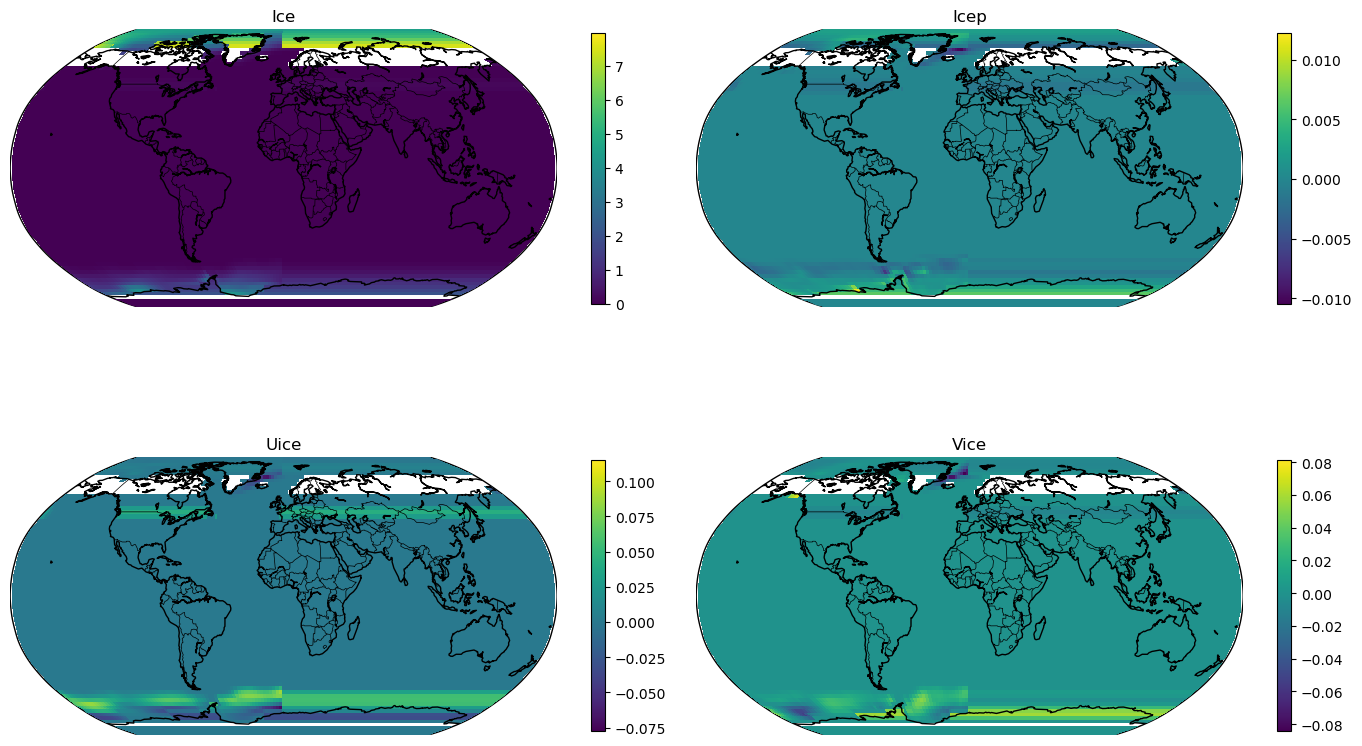

In [32]:
plot_global_ice_variables(seaice_all_F)

In [33]:
path='T_LOVCLIM_800/loveclim784k_orbital/proj/elke/data/loveclim784k/loveclim_784k_seaice.nc'

import xarray as xr
seaice_orb= xr.open_dataset(path)
seaice_orb

<xarray.Dataset>
Dimensions:    (mtime: 7840, latitude: 72, longitude: 144)
Coordinates:
  * latitude   (latitude) float64 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * longitude  (longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * mtime      (mtime) float64 784.0 783.9 783.8 783.7 783.6 ... 0.4 0.3 0.2 0.1
Data variables:
    ice        (mtime, latitude, longitude) float64 ...
    icep       (mtime, latitude, longitude) float64 ...
    uice       (mtime, latitude, longitude) float64 ...
    vice       (mtime, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.7
    title:        Loveclim 784k ice
    note:         100 year average

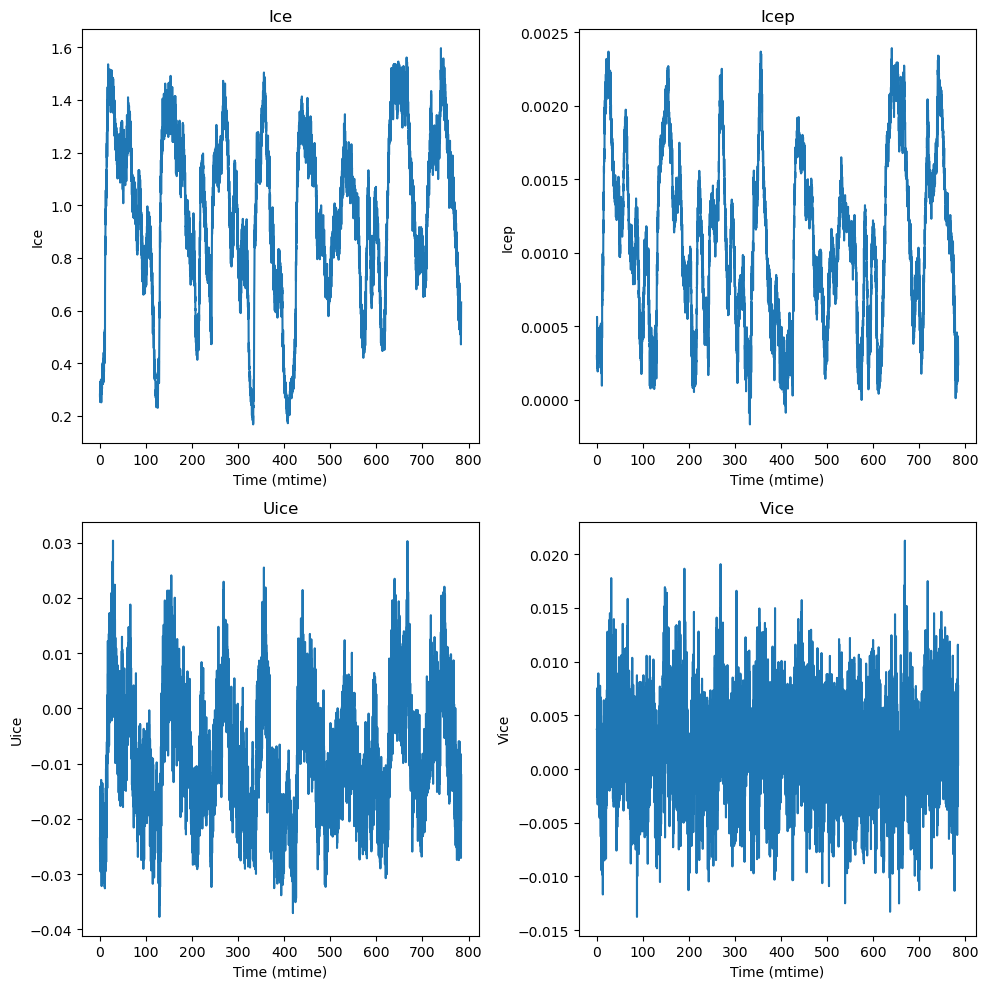

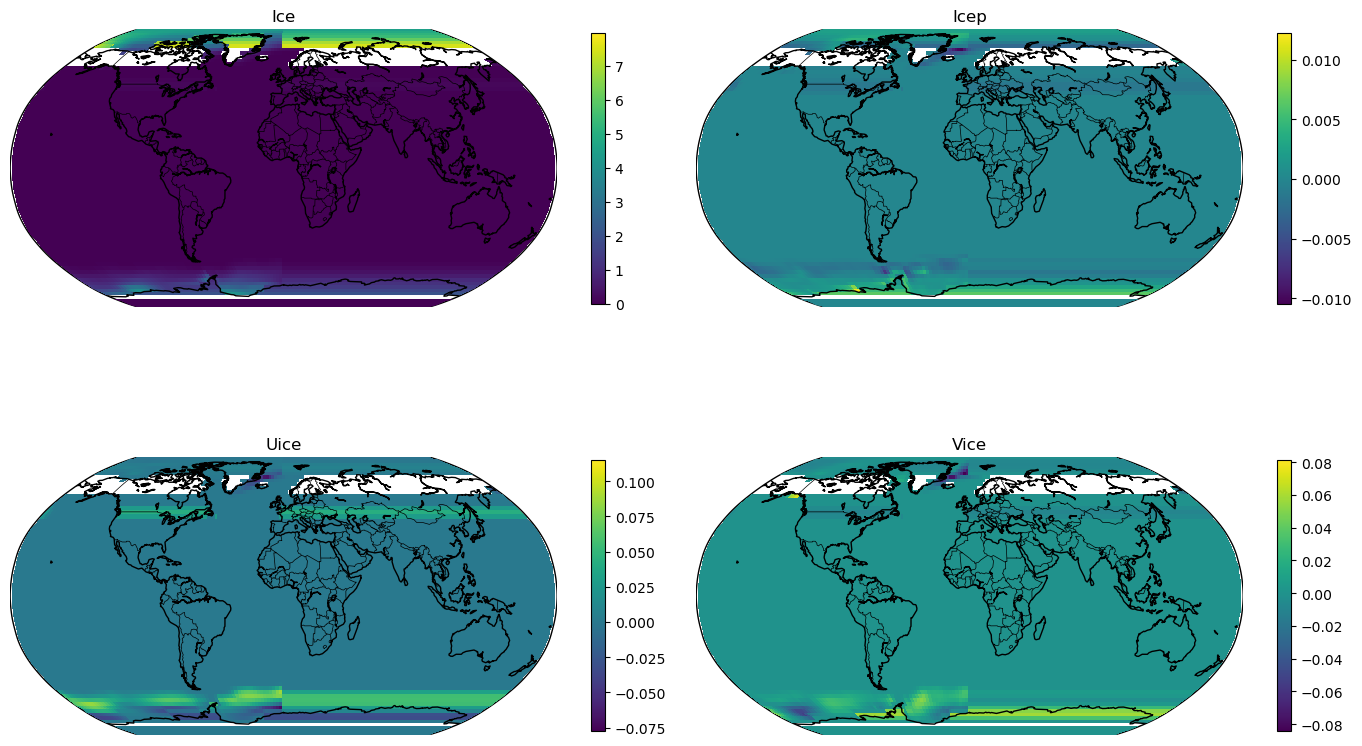

In [34]:
plot_ice_timeseries(seaice_orb, 10)
plot_global_ice_variables(seaice_orb)

In [37]:
path='T_LOVCLIM_800/loveclim784k_orbital/proj/elke/data/loveclim784k/loveclim_se_orbital_only_seaice.nc'

import xarray as xr
loveclim_seaice_orb= xr.open_dataset(path)
# rename the lon to longitude
loveclim_seaice_orb=loveclim_seaice_orb.rename({'lon':'longitude'})
loveclim_seaice_orb=loveclim_seaice_orb.rename({'lat':'latitude'})
loveclim_seaice_orb

<xarray.Dataset>
Dimensions:    (mtime: 4080, latitude: 72, longitude: 144)
Coordinates:
  * latitude   (latitude) float64 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * longitude  (longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * mtime      (mtime) float64 408.0 407.9 407.8 407.7 407.6 ... 0.4 0.3 0.2 0.1
Data variables:
    ice        (mtime, latitude, longitude) float64 ...
    icep       (mtime, latitude, longitude) float64 ...
    uice       (mtime, latitude, longitude) float64 ...
    vice       (mtime, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.7
    title:        Loveclim sensitivity experiment with orbital only - sea ice
    note:         100 year average

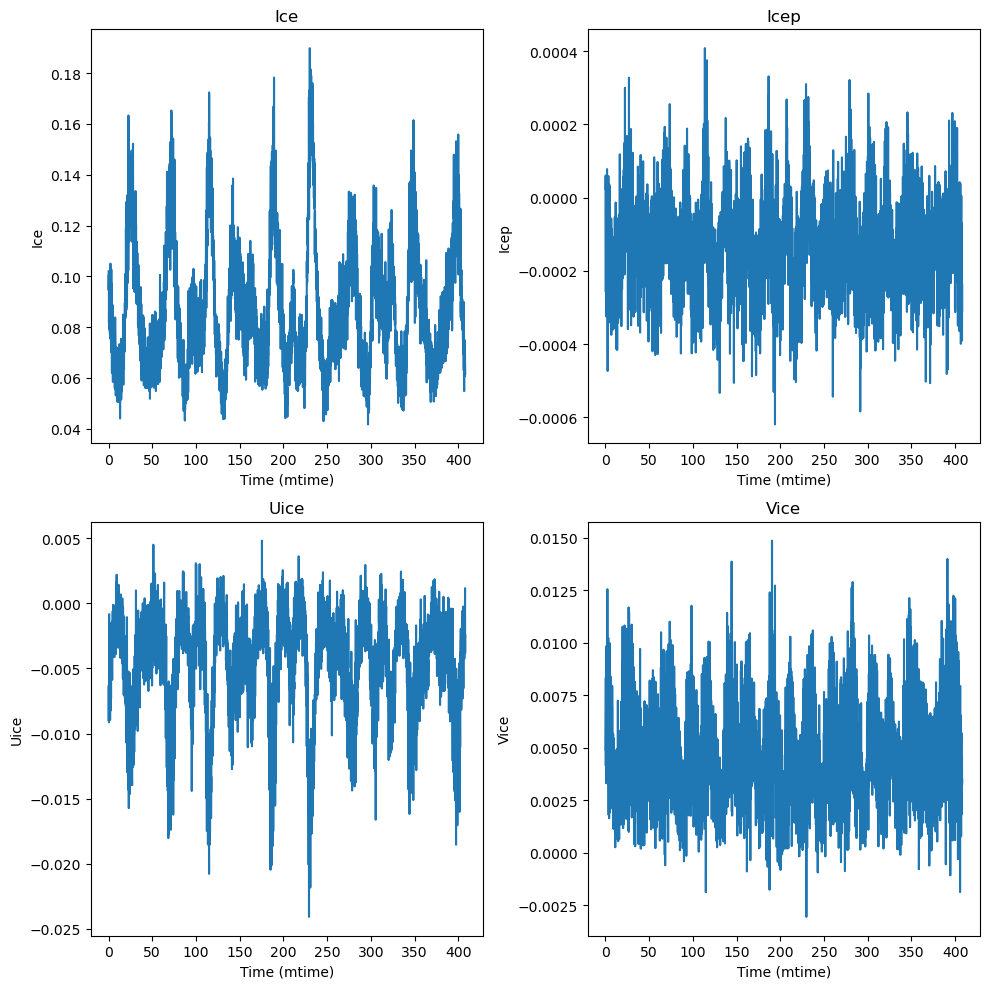

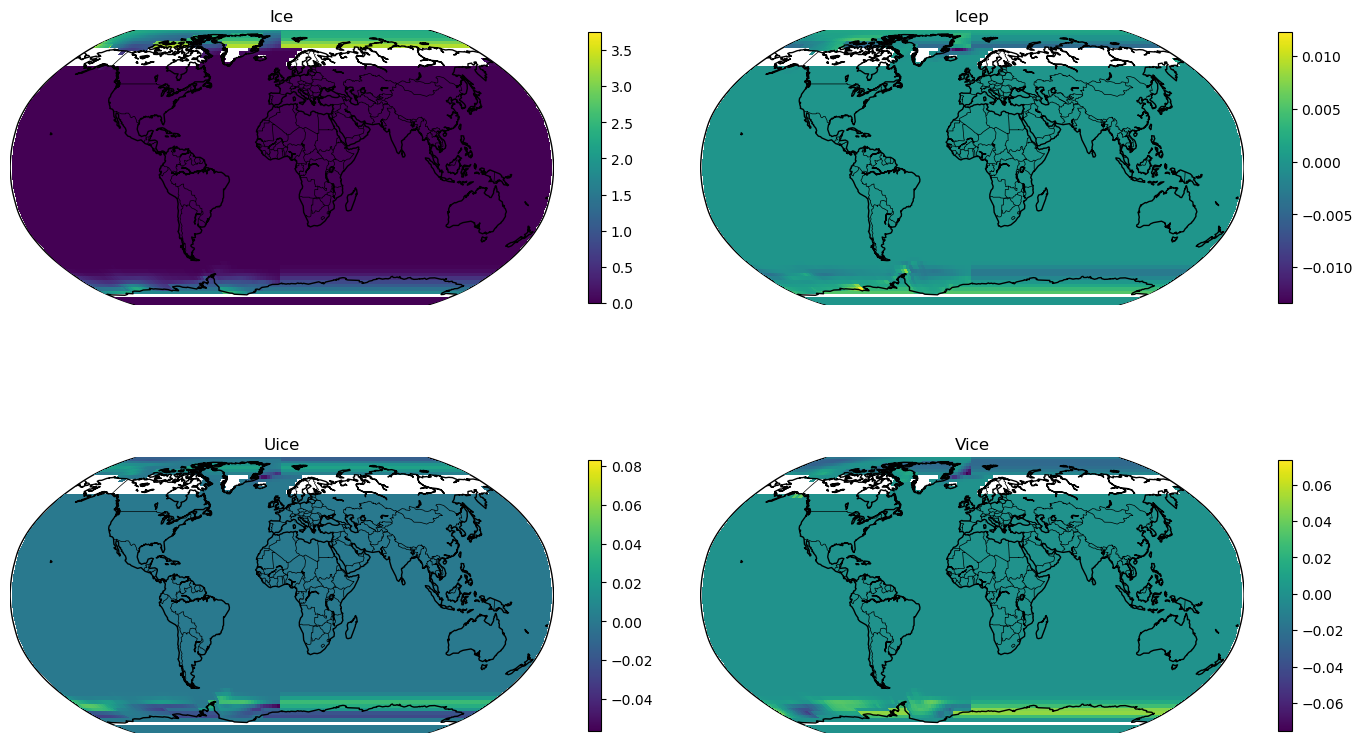

In [38]:
plot_ice_timeseries(loveclim_seaice_orb, 10)
plot_global_ice_variables(loveclim_seaice_orb)

# Calculate sea ice area

In [54]:
np.diff(seaice_orb['longitude'].values)[0]

2.5

In [55]:
seaice_orb

<xarray.Dataset>
Dimensions:    (mtime: 7840, latitude: 72, longitude: 144)
Coordinates:
  * latitude   (latitude) float64 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * longitude  (longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * mtime      (mtime) float64 784.0 783.9 783.8 783.7 783.6 ... 0.4 0.3 0.2 0.1
Data variables:
    ice        (mtime, latitude, longitude) float64 ...
    icep       (mtime, latitude, longitude) float64 ...
    uice       (mtime, latitude, longitude) float64 ...
    vice       (mtime, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.7
    title:        Loveclim 784k ice
    note:         100 year average

In [56]:
import xarray as xr
import numpy as np
import pickle

def calculate_sea_ice_area(ds_seaice, lat_slice):
    """
    Calculates the sea ice area for a given latitude slice and saves the results.

    Args:
    ds_seaice (xarray.Dataset): Dataset containing the sea ice concentration data.
    lat_slice (tuple): Tuple of float, indicating the latitude range to consider.
    file_path (str): Path to save the resulting data.

    Returns:
    None
    """
    # Select the dataset within the latitude slice
    ds_seaice_subset = ds_seaice.sel(latitude=slice(*lat_slice))

    # Constants
    R = 6371  # Earth's radius in km
    lon_step=np.diff(seaice_orb['longitude'].values)[0]
    delta_theta = lon_step / 180 * np.pi  # 2.5 degree in radians

    # Convert latitude values to radians
    lat_radians = np.radians(ds_seaice_subset['latitude'].values)

    # Compute latitudinal boundaries
    lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2
    A = R**2 * delta_theta * (np.sin(lat_boundaries[1:]) - np.sin(lat_boundaries[:-1]))  # area of each grid

    A_center_lats = ds_seaice_subset['latitude'].values[1:-1]

    # remove the data corresponds to the last and first lat in ds_seaice_subset
    ds_seaice_subset_reduced = ds_seaice_subset.isel(latitude=slice(1, -1))

    # Create an xarray DataArray for A with the dimension 'lat' and values of 'A_center_lats'
    A_xr = xr.DataArray(A, dims=["latitude"], coords={"latitude": A_center_lats})


    sic_mean = ds_seaice_subset_reduced['icep'][:, :, :]

    # Multiplying sic with A
    sic_area = sic_mean * A_xr

    # Sum up the resulting product over the latitude (and longitude, if needed)
    total_sic_area = sic_area.sum(dim=["latitude", "longitude"]).values / 1e6

    # Add age to total_sic_area so it got two columns
    total_sic_area = np.column_stack((ds_seaice_subset_reduced['mtime'].values, total_sic_area))

    return total_sic_area



Text(0, 0.5, 'Sea ice area (10^6 km^2)')

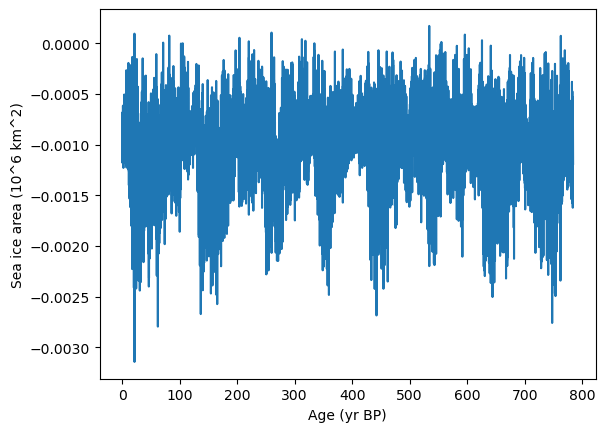

In [59]:
sh_iceA = calculate_sea_ice_area(seaice_orb, (-90, 0))


#plot total_sic_area
import matplotlib.pyplot as plt
plt.plot(sh_iceA[:,0],sh_iceA[:,1]) 
plt.xlabel('Age (yr BP)')
plt.ylabel('Sea ice area (10^6 km^2)') 